In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pandas as pd 

In [2]:
# load clean HSI_data
df = pd.read_csv('Clean_HSI.csv')
df.head()

,Date,Open,High,Low,Close,Up votes,Down votes
0,2022-02-24,23268.03,23376.37,22786.39,22901.56,0.69,0.31
1,2022-02-25,22908.10,23046.86,22718.15,22767.18,0.36,0.64
2,2022-02-28,22818.17,22818.17,22406.12,22713.02,0.61,0.39
3,2022-03-01,22739.84,22937.56,22591.73,22761.71,0.49,0.51
4,2022-03-02,22568.36,22712.44,22299.14,22343.92,0.48,0.52


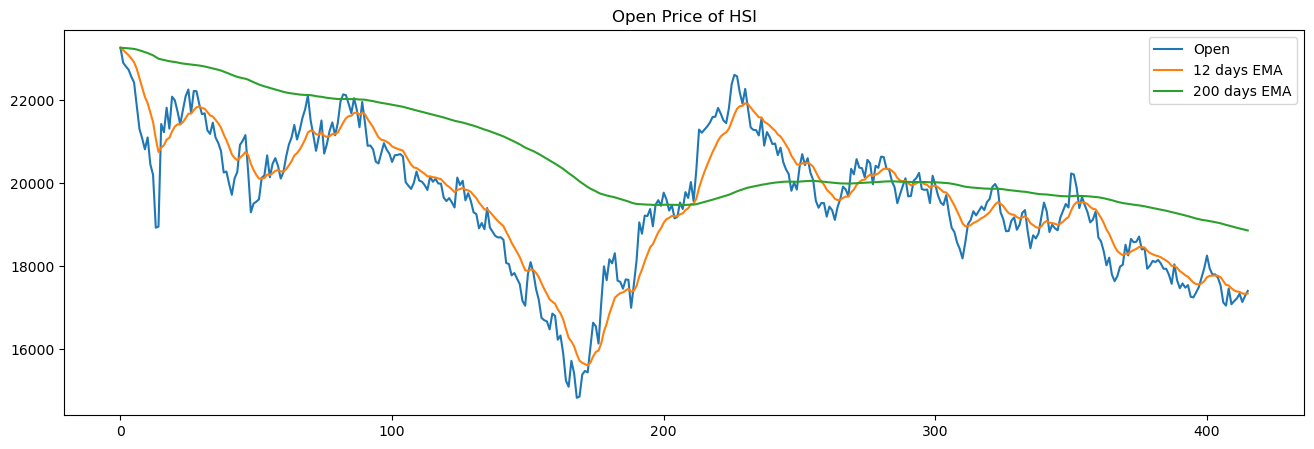

In [3]:
# simple data ploting 
plt.subplots(figsize=(16,5))
plt.title('Open Price of HSI')
plt.plot(df['Open'], label=f'Open')
plt.plot(df['Open'].ewm(span=12, adjust=False).mean(), label=f'12 days EMA')
plt.plot(df['Open'].ewm(span=200, adjust=False).mean(), label=f'200 days EMA')
plt.legend()


In [4]:
df['Open'].ewm(span=200, adjust=False).mean()

0      23268.030000
1      23264.448607
2      23260.008024
3      23254.832223
4      23248.001653
           ...     
411    18928.701391
412    18912.870531
413    18895.224058
414    18879.175958
415    18864.516595
Name: Open, Length: 416, dtype: float64

# Features Engineering 

In [5]:
import itertools 

# define the df.keys 
keys = ['Open','Close', 'High','Low']

# compute the combinations 
combinations = list(itertools.combinations(keys, 2))
combinations

[('Open', 'Close'),
 ('Open', 'High'),
 ('Open', 'Low'),
 ('Close', 'High'),
 ('Close', 'Low'),
 ('High', 'Low')]

In [6]:
# compute the EMA for Open Close HIgh Low 
for i in keys: 
    df[f"12DaysEMA{i}"] = df[i].ewm(span=12, adjust=False).mean()
    df[f"26DaysEMA{i}"] = df[i].ewm(span=26, adjust=False).mean()

# compute the difference of EMAs of [Open, close, high, low ] combinations 
for i in combinations: 
    # print(f"{i[0]} {i[1]}")
    df[f"Difference{i[0]}{i[1]}"] = df[f"{i[0]}"] - df[f"{i[1]}"]
    df[f"macd{i[0]}{i[1]}"] = df[f"12DaysEMA{i[0]}"] - df[f"26DaysEMA{i[1]}"]
    df[f'12Days_Diff{i[0]}{i[1]}'] = df[f"12DaysEMA{i[0]}"]  - df[f"12DaysEMA{i[1]}"]
    df[f'26Days_Diff{i[0]}{i[1]}'] = df[f"26DaysEMA{i[0]}"]  - df[f"26DaysEMA{i[1]}"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  416 non-null    object 
 1   Open                  416 non-null    float64
 2   High                  416 non-null    float64
 3   Low                   416 non-null    float64
 4   Close                 416 non-null    float64
 5   Up votes              416 non-null    float64
 6   Down votes            416 non-null    float64
 7   12DaysEMAOpen         416 non-null    float64
 8   26DaysEMAOpen         416 non-null    float64
 9   12DaysEMAClose        416 non-null    float64
 10  26DaysEMAClose        416 non-null    float64
 11  12DaysEMAHigh         416 non-null    float64
 12  26DaysEMAHigh         416 non-null    float64
 13  12DaysEMALow          416 non-null    float64
 14  26DaysEMALow          416 non-null    float64
 15  DifferenceOpenClose   4

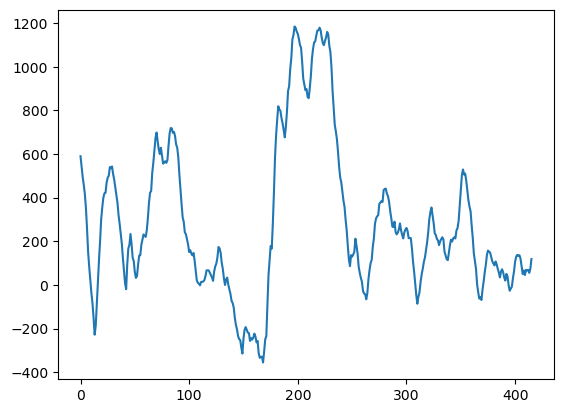

In [19]:
keys = [ "macdHighLow"] 
for i in keys: 
    plt.plot(df[f"{i}"])

In [8]:
df[
["macdOpenClose", "macdOpenHigh", "macdOpenLow", "macdCloseHigh", "macdCloseLow", "macdHighLow" , 'Up votes']
].corr()

,macdOpenClose,macdOpenHigh,macdOpenLow,macdCloseHigh,macdCloseLow,macdHighLow,Up votes
macdOpenClose,1.000000,0.985788,0.988234,0.954000,0.954527,0.951665,0.189784
macdOpenHigh,0.985788,1.000000,0.966001,0.980684,0.947257,0.920511,0.199557
macdOpenLow,0.988234,0.966001,1.000000,0.952602,0.981824,0.984930,0.190766
macdCloseHigh,0.954000,0.980684,0.952602,1.000000,0.971125,0.931500,0.218324
macdCloseLow,0.954527,0.947257,0.981824,0.971125,1.000000,0.988291,0.209244
macdHighLow,0.951665,0.920511,0.984930,0.931500,0.988291,1.000000,0.193074
Up votes,0.189784,0.199557,0.190766,0.218324,0.209244,0.193074,1.000000


# Machine Learning

In [9]:
# shift the up votes by 1 day 
df['Up votes'] = df['Up votes'].shift(-1)
df.iloc[:-1, 1:]

,Open,High,Low,Close,Up votes,Down votes,12DaysEMAOpen,26DaysEMAOpen,12DaysEMAClose,26DaysEMAClose,...,12Days_DiffCloseHigh,26Days_DiffCloseHigh,DifferenceCloseLow,macdCloseLow,12Days_DiffCloseLow,26Days_DiffCloseLow,DifferenceHighLow,macdHighLow,12Days_DiffHighLow,26Days_DiffHighLow
0,23268.03,23376.37,22786.39,22901.56,0.360000,0.310000,23268.030000,23268.030000,22901.560000,22901.560000,...,-474.810000,-474.810000,115.17,115.170000,115.170000,115.170000,589.98,589.980000,589.980000,589.980000
1,22908.10,23046.86,22718.15,22767.18,0.610000,0.640000,23212.656154,23241.368519,22880.886154,22891.605926,...,-444.790000,-460.355926,49.03,99.550969,104.994615,110.270741,328.71,544.340969,549.784615,570.626667
2,22818.17,22818.17,22406.12,22713.02,0.490000,0.390000,23151.965976,23210.020480,22855.060592,22878.377339,...,-392.537692,-434.044376,306.90,101.519124,136.056982,124.835871,412.05,494.056816,528.594675,558.880247
3,22739.84,22937.56,22591.73,22761.71,0.480000,0.510000,23088.561980,23175.192296,22840.698962,22869.735314,...,-359.201124,-414.918867,169.98,99.143529,141.275908,128.179881,345.83,458.344653,500.477032,543.098747
4,22568.36,22712.44,22299.14,22343.92,0.500000,0.520000,23008.530906,23130.241756,22764.271430,22830.786031,...,-360.634797,-411.481913,44.78,55.487510,126.430384,122.002112,413.30,416.122307,487.065181,533.484025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,17160.23,17497.72,17078.24,17398.00,0.535765,0.464235,17421.417141,17623.261799,17375.702963,17577.777634,...,-164.092776,-159.438595,319.76,-94.924688,118.596852,107.149982,419.48,69.168088,282.689628,266.588576
411,17225.65,17406.36,17225.65,17406.36,0.610000,0.464235,17391.299119,17593.809073,17380.419430,17565.080031,...,-138.847734,-147.628328,180.71,-72.061728,128.152721,112.598872,180.71,66.786005,267.000454,260.227200
412,17337.70,17337.70,17042.10,17112.48,0.420000,0.390000,17383.053101,17574.838031,17339.197980,17531.554103,...,-152.135775,-153.375859,70.38,-82.884575,119.264610,109.471548,295.60,69.251200,271.400384,262.847408
413,17139.40,17188.85,16979.26,17101.78,0.510000,0.580000,17345.568009,17542.583362,17302.672137,17499.718984,...,-142.125656,-148.464314,122.52,-86.608747,119.765439,110.438100,209.59,55.516908,261.891095,258.902415


In [10]:
clean_df = df.iloc[:-1, 1:]
clean_df.drop('Down votes', axis=1, inplace=True)

In [11]:
# split the data into traning set and test ste 
from sklearn.model_selection import train_test_split

# Define the train-test split ratio
train_ratio = 0.8  # 80% for training, 20% for testing

# Calculate the index to split the data
split_index = int(train_ratio * len(clean_df))

# Split the data into train and test sets
train_data = clean_df.iloc[:split_index]
test_data = clean_df.iloc[split_index:]

target = "Up votes"

# Separate the features and target variables
X_train = train_data.drop(f"{target}", axis=1)
y_train = train_data[f"{target}"]
X_test = test_data.drop(f"{target}", axis=1)
y_test = test_data[f"{target}"]


In [12]:
# normalize the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train) 
X_test_norm = scaler.fit_transform(X_test) 

y_train = y_train.values.reshape(-1, 1)
y_train_norm = scaler.fit_transform(y_train) 

y_binary = [1 if p >= 0.5 else 0 for p in y_train]



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the logistic regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train_norm, y_binary)

# Make predictions on the test data
y_pred = model.predict(X_test_norm)

In [16]:
y_test_bin = [1 if p >= 0.5 else 0 for p in y_test]
accuracy = accuracy_score(y_test_bin, y_pred)
precision = precision_score(y_test_bin, y_pred)
recall = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6385542168674698
Precision: 0.7213114754098361
Recall: 0.7719298245614035
F1-score: 0.7457627118644067


In [ ]:
y_true = [1 if p >= 0.5 else 0 for p in y_test] 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_binary, y_pred)
cm